## Data pre-processing

### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### Load dataset

In [3]:
# Load the dataset
raw_df = pd.read_csv('Dataset/Formatted-dataset.csv')

### Removing Missing Values and "\N" from rows

In [10]:
print(raw_df.isnull().values.any())

False


In [13]:
# Drop rows where any column contains the value '\N'
df = raw_df[~raw_df.isin(['\\N']).any(axis=1)]
df.head(5)


,SDST,SDET,SERVICE_NAME,TKIS_TIME
0,2020-07-28 13:37:12,2020-07-28 13:37:25,Deposit (Current/SND),2020-07-28 13:37:11
1,2020-07-28 13:37:25,2020-07-28 13:37:27,Withdrawal (Current/SND),2020-07-28 13:37:18
2,2020-07-28 15:37:47,2020-07-28 15:37:49,Withdrawal,2020-07-28 15:36:45
3,2020-07-28 15:46:07,2020-07-28 16:04:53,Debit Card,2020-07-28 15:38:52
4,2020-07-28 15:40:56,2020-07-28 15:41:49,Agent,2020-07-28 15:40:55


In [16]:
print(f'Before removing \"\\N\" the shape is: {raw_df.shape}')
print(f'After removing \"\\N\" the shape is: {df.shape}')

Before removing "\N" the shape is: (285357, 4)
After removing "\N" the shape is: (280046, 4)


### Performing Label Encoding on SERVICE_NAME

In [18]:
df = df.copy()
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the SERVICE_NAME column
df['encoded_service_name'] = label_encoder.fit_transform(df['SERVICE_NAME']) + 1

# Display label names and their corresponding values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)+1))
print("Label Encoding Mapping (SERVICE_NAME -> Encoded Value):")
for label, value in label_mapping.items():
    print(f"{label}: {value}")

# Display a preview of the updated DataFrame
print("\nUpdated DataFrame preview:")
print(df.tail(5))


Label Encoding Mapping (SERVICE_NAME -> Encoded Value):
A/C Opening: 1
Account Modification / Update: 2
Accounts: 3
Agent: 4
Bill: 5
Certificate: 6
Cheque Book: 7
Clearing Cheque: 8
Credit Card: 9
Credit Card Payment: 10
Customer(Mobile Banking): 11
DPS: 12
Debit Card: 13
Deposit: 14
Deposit (Current/SND): 15
FDR: 16
Foreign Remittance: 17
Fund Transfer: 18
Internet Banking/2FA: 19
P/O By Cash: 20
P/O By Cheque: 21
Prize Bond: 22
Sanchay Patra: 23
Shipping Guarantee: 24
Statement: 25
Torn Note Exchange: 26
VIP Banking Customer: 27
Withdrawal: 28
Withdrawal (Current/SND): 29
Women Entrepreneurship Loan: 30

Updated DataFrame preview:
                       SDST                 SDET SERVICE_NAME  \
285343  2022-03-02 14:21:55  2022-03-02 14:24:27      Deposit   
285344  2022-03-02 14:24:27  2022-03-02 14:27:51      Deposit   
285346  2022-03-02 14:27:51  2022-03-02 14:28:06      Deposit   
285348  2022-03-02 14:30:49  2022-03-02 14:32:01   Withdrawal   
285349  2022-03-02 14:28:06  2022-

### Calculation of waiting time

In [19]:
# Ensure the columns are in datetime format
df['SDST'] = pd.to_datetime(df['SDST'], errors='coerce')
df['TKIS_TIME'] = pd.to_datetime(df['TKIS_TIME'], errors='coerce')

# Calculate waiting time (difference between SDST and TKIS_TIME)
df['waiting_time'] = (df['SDST'] - df['TKIS_TIME']).dt.total_seconds()

# Display results
print("Updated DataFrame with waiting time:")
print(df[['SDST', 'TKIS_TIME', 'waiting_time']].head(5))


Updated DataFrame with waiting time:
                 SDST           TKIS_TIME  waiting_time
0 2020-07-28 13:37:12 2020-07-28 13:37:11           1.0
1 2020-07-28 13:37:25 2020-07-28 13:37:18           7.0
2 2020-07-28 15:37:47 2020-07-28 15:36:45          62.0
3 2020-07-28 15:46:07 2020-07-28 15:38:52         435.0
4 2020-07-28 15:40:56 2020-07-28 15:40:55           1.0


### Feature Extraction (Seconds, Day, Month, Year) From Arrival Time

In [20]:
# Ensure TKIS_TIME is in datetime format
df['TKIS_TIME'] = pd.to_datetime(df['TKIS_TIME'], errors='coerce')

# Feature 1: Convert arrival time into seconds
df['arrival_time'] = df['TKIS_TIME'].dt.hour * 3600 + df['TKIS_TIME'].dt.minute * 60 + df['TKIS_TIME'].dt.second

# Feature 2: Extract only the day (date without month and year)
df['arrival_day'] = df['TKIS_TIME'].dt.day

# Feature 3: Extract arrival month (numeric month)
df['arrival_month'] = df['TKIS_TIME'].dt.month  

# Feature 4: Extract arrival month (numeric month)
df['arrival_year'] = df['TKIS_TIME'].dt.year

# Display the updated DataFrame with new columns
# print(df[['TKIS_TIME', 'arrival_time_seconds', 'arrival_day', 'arrival_month', 'arrival_year']].head(5))
df.tail(5)

,SDST,SDET,SERVICE_NAME,TKIS_TIME,encoded_service_name,waiting_time,arrival_time,arrival_day,arrival_month,arrival_year
285343,2022-03-02 14:21:55,2022-03-02 14:24:27,Deposit,2022-03-02 14:19:24,14,151.0,51564,2,3,2022
285344,2022-03-02 14:24:27,2022-03-02 14:27:51,Deposit,2022-03-02 14:19:53,14,274.0,51593,2,3,2022
285346,2022-03-02 14:27:51,2022-03-02 14:28:06,Deposit,2022-03-02 14:20:48,14,423.0,51648,2,3,2022
285348,2022-03-02 14:30:49,2022-03-02 14:32:01,Withdrawal,2022-03-02 14:22:22,28,507.0,51742,2,3,2022
285349,2022-03-02 14:28:06,2022-03-02 14:28:15,Deposit,2022-03-02 14:23:41,14,265.0,51821,2,3,2022


In [22]:
# Save the updated dataset to a new CSV file
df.to_csv('pre_processed_dataset.csv', index=False)

Feature Importance

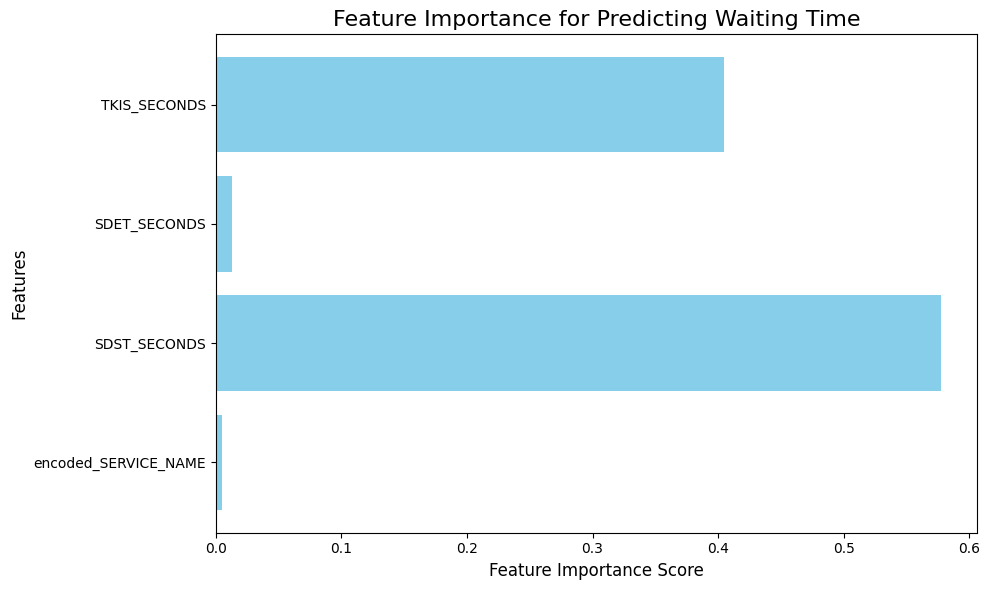

encoded_SERVICE_NAME: 0.0051
SDST_SECONDS: 0.5773
SDET_SECONDS: 0.0131
TKIS_SECONDS: 0.4045


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('updated_dataset_with_waiting_time.csv')

# Ensure relevant columns are numeric and clean data
df['encoded_SERVICE_NAME'] = pd.to_numeric(df['encoded_SERVICE_NAME'], errors='coerce')
df['waiting_time'] = pd.to_numeric(df['waiting_time'], errors='coerce')
df['SDST'] = pd.to_datetime(df['SDST'], errors='coerce')
df['SDET'] = pd.to_datetime(df['SDET'], errors='coerce')
df['TKIS_TIME'] = pd.to_datetime(df['TKIS_TIME'], errors='coerce')

# Drop rows with missing or zero waiting time values
df = df.dropna(subset=['encoded_SERVICE_NAME', 'waiting_time', 'SDST', 'SDET', 'TKIS_TIME'])
# df = df[df['waiting_time'] > 0]  # Remove rows where waiting_time is 0

# Convert datetime columns to numerical features (seconds since the start of the day)
df['SDST_SECONDS'] = df['SDST'].dt.hour * 3600 + df['SDST'].dt.minute * 60 + df['SDST'].dt.second
df['SDET_SECONDS'] = df['SDET'].dt.hour * 3600 + df['SDET'].dt.minute * 60 + df['SDET'].dt.second
df['TKIS_SECONDS'] = df['TKIS_TIME'].dt.hour * 3600 + df['TKIS_TIME'].dt.minute * 60 + df['TKIS_TIME'].dt.second

# Define features (X) and target (y)
X = df[['encoded_SERVICE_NAME', 'SDST_SECONDS', 'SDET_SECONDS', 'TKIS_SECONDS']]
y = df['waiting_time']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting Waiting Time', fontsize=16)
plt.tight_layout()
plt.show()

# Print feature importance scores
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importance

Mean Squared Error: 606480.6169820107
R-squared: 0.7662946123177541


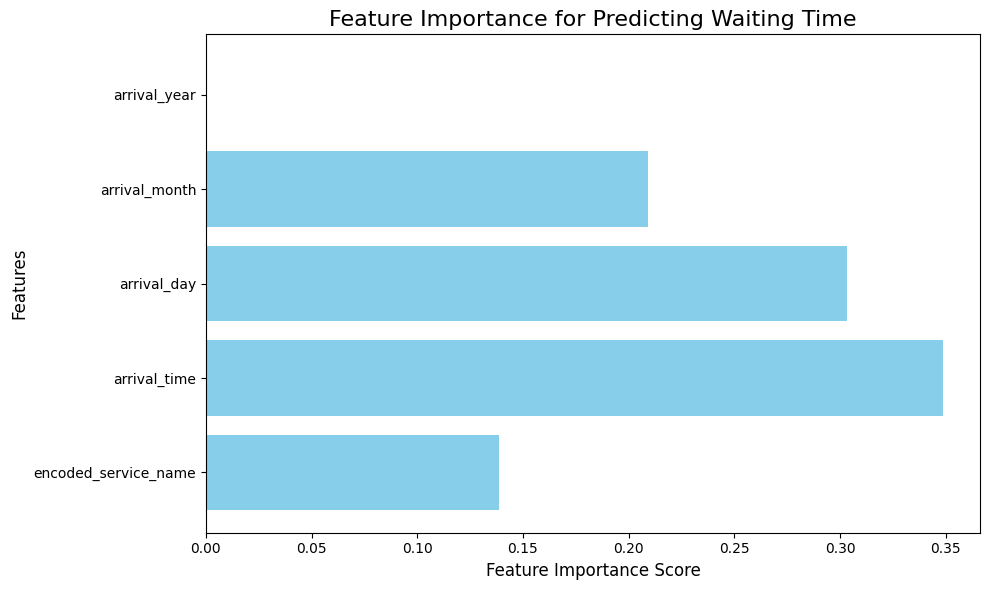

encoded_service_name: 0.1387
arrival_time: 0.3488
arrival_day: 0.3031
arrival_month: 0.2093
arrival_year: 0.0000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('pre_processed_dataset.csv')

# Ensure relevant columns are numeric and clean data
df['encoded_service_name'] = pd.to_numeric(df['encoded_service_name'], errors='coerce')
df['arrival_time'] = pd.to_numeric(df['arrival_time'], errors='coerce')
df['arrival_day'] = pd.to_numeric(df['arrival_day'], errors='coerce')
df['arrival_month'] = pd.to_numeric(df['arrival_month'], errors='coerce')
df['arrival_year'] = pd.to_datetime(df['arrival_year'], errors='coerce').dt.year  # Extract arrival year

# Drop rows with missing values
df = df.dropna(subset=['waiting_time', 'encoded_service_name', 'arrival_time', 'arrival_day', 'arrival_month', 'arrival_year'])

# Define features (X) and target (y)
X = df[['encoded_service_name', 'arrival_time', 'arrival_day', 'arrival_month', 'arrival_year']]
y = df['waiting_time']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Random Forest Regressor Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
rfr_model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    max_depth=30,
    random_state=42,
)

# Train a Random Forest Regressor
# rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get feature importance scores
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting Waiting Time', fontsize=16)
plt.tight_layout()
plt.show()

# Print feature importance scores
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")
